# Challenge: Sprint 3
##### *Descrição da Entrega:* Análise do banco de dados sobre diabetes e doenças relacionadas
##### *Banco de Dados:* 'Diabetes.csv'

#### Contexto:
Após a análise de um tipo de enfermidade incidente sobre a população (COVID-19), o próximo passo para um cientista de dados é o entendimento preliminar de outra enfermidade e um segundo passo em direção à previsão de enfermidades com algoritmos de machine learning. Para isso, é preciso que o cientista entenda as principais variáveis determinantes da diabetes e a inter-relação entre essas variáveis. Diabetes está entre as doenças crônicas mais prevalentes no mundo, impactando milhões de pessoas a cada ano e exercendo uma carga financeira significativa na economia. O diabetes é uma doença crônica séria em que os indivíduos perdem a capacidade de regular eficazmente os níveis de glicose no sangue, o que pode levar à redução da qualidade e expectativa de vida. Após a digestão dos alimentos, os açúcares resultantes são liberados na corrente sanguínea, sinalizando ao pâncreas para liberar insulina. A insulina ajuda a permitir que as células do corpo utilizem esses açúcares presentes no sangue como fonte de energia. O diabetes é geralmente caracterizado pelo corpo não produzir insulina suficiente ou não conseguir usar a insulina produzida de maneira eficaz.

#### Variáveis:

- Diabetes_012: 0 = sem diabetes, 1 = pré-diabetes, 2 = diabetes
- HighBP: 0 = sem pressão alta, 1 = pressão alta
- HighChol: 0 = sem colesterol alto, 1 = colesterol alto
- CholCheck: 0 = não fez verificação de colesterol nos últimos 5 anos, 1 = fez verificação
- BMI: Índice de Massa Corporal
- Smoker: Já fumou pelo menos 100 cigarros? 0 = não, 1 = sim
- Stroke: Já teve um derrame? 0 = não, 1 = sim
- HeartDiseaseorAttack: Doença cardíaca ou infarto? 0 = não, 1 = sim
- PhysActivity: Atividade física nos últimos 30 dias? 0 = não, 1 = sim
- Fruits: Consumo de frutas 1 ou mais vezes ao dia? 0 = não, 1 = sim
- Veggies: Consumo de vegetais 1 ou mais vezes ao dia? 0 = não, 1 = sim
- HvyAlcoholConsump: Bebedor excessivo? 0 = não, 1 = sim
- AnyHealthcare: Possui algum tipo de cobertura de saúde? 0 = não, 1 = sim
- NoDocbcCost: Precisou de consulta médica, mas não pôde pagar? 0 = não, 1 = sim
- GenHlth: Saúde geral (escala de 1 a 5)
- MentHlth: Quantos dias sua saúde mental não esteve boa nos últimos 30 dias? (escala de 1 a 30)
- PhysHlth: Quantos dias sua saúde física não esteve boa nos últimos 30 dias? (escala de 1 a 30)
- DiffWalk: Dificuldade para caminhar ou subir escadas? 0 = não, 1 = sim
- Sex: 0 = feminino, 1 = masculino
- Age: Categoria de idade em 13 níveis
- Education: Nível de educação (escala de 1 a 6)
- Income: Escala de renda (escala de 1 a 8)

#### Objetivo:
O cientista deve analisar o conjunto de dados para entender o inter-relacionamento entre as variáveis, com uma entrega da análise do banco de dados seguindo os seguintes passos:

#### Valor Total da Entrega (100 pontos)
##### Documentação (80 pontos):
- Análise, limpeza e formatação dos dados: Remoção de duplicatas, identificação de valores nulos e tratamento de outliers (20 pontos)
- Estatísticas descritivas das variáveis (20 pontos)
- Gráficos: entre 3 e 4 gráficos focando na distribuição e inter-relacionamento entre as variáveis (10 pontos)
- Análise de correlação e testes de hipóteses: Cálculo da matriz de correlação e execução de ao menos dois testes de hipótese (20 pontos)
- Organização (10 pontos)

##### Apresentação (20 pontos):
- Descrição resumida do projeto, das variáveis e dos tratamentos realizados na base (5 pontos)
- Comentários sobre as estatísticas descritivas e comportamento dos principais gráficos (5 pontos)
- Conclusões dos testes de correlação e de hipótese (5 pontos)
- Organização (5 pontos): Cinco slides de apresentação executiva, sendo o primeiro com objetivo e resumo executivo, três slides com gráficos e análise de estatísticas descritivas, e um slide final com conclusão geral.

# Importações e Leitura da base

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('sp03_diabetes.csv')
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# Análise, limpeza e formatação dos dados

### Remoção de Duplicatas

In [8]:
df.drop_duplicates(inplace=True)
df.count()

Diabetes_012            229781
HighBP                  229781
HighChol                229781
CholCheck               229781
BMI                     229781
Smoker                  229781
Stroke                  229781
HeartDiseaseorAttack    229781
PhysActivity            229781
Fruits                  229781
Veggies                 229781
HvyAlcoholConsump       229781
AnyHealthcare           229781
NoDocbcCost             229781
GenHlth                 229781
MentHlth                229781
PhysHlth                229781
DiffWalk                229781
Sex                     229781
Age                     229781
Education               229781
Income                  229781
dtype: int64

### Tratamento de Nulos

In [10]:
print(df.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


Não existem valores nulos

### Verificando Outliers

Vou ver pelo boxplot quais colunas tem outliers e depois remover.

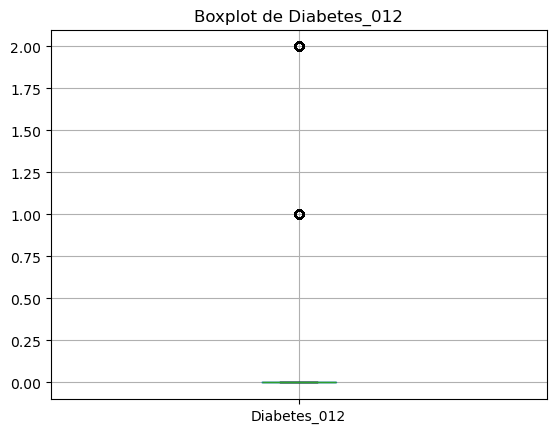

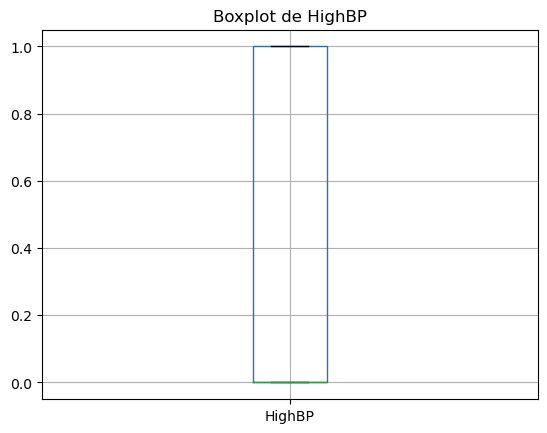

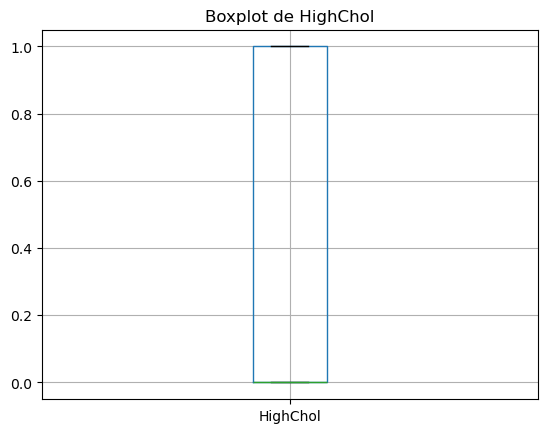

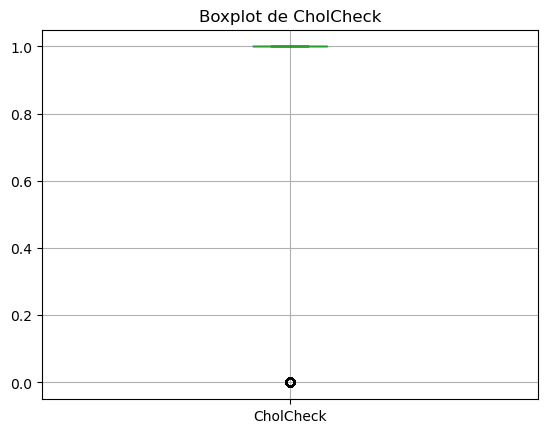

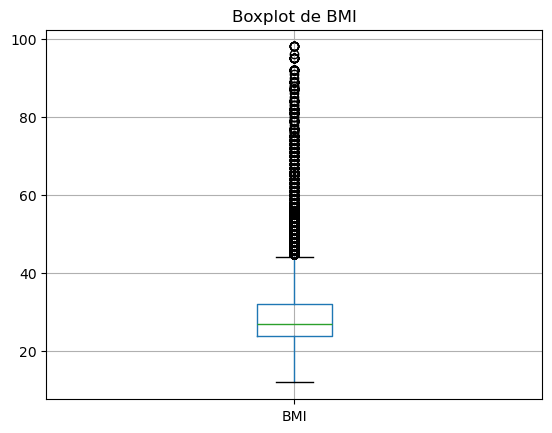

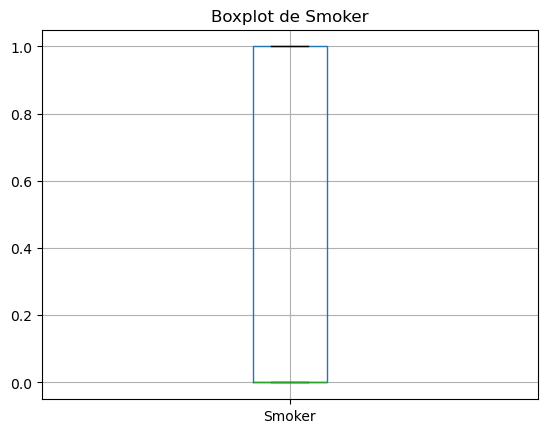

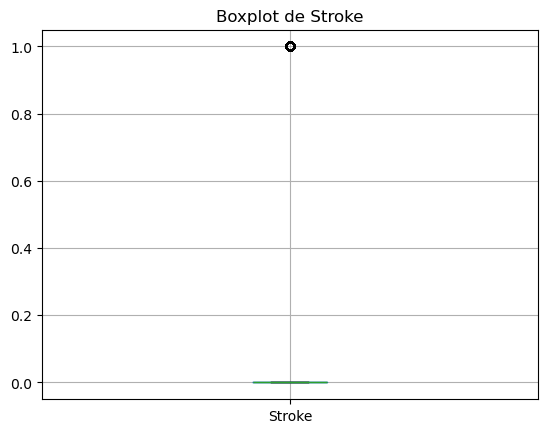

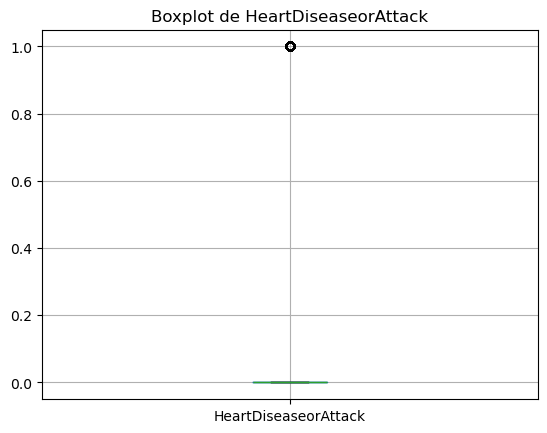

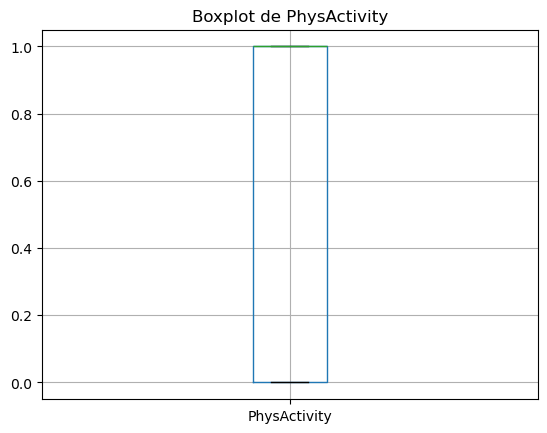

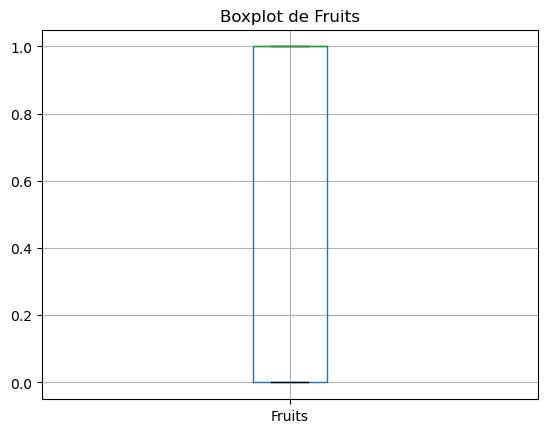

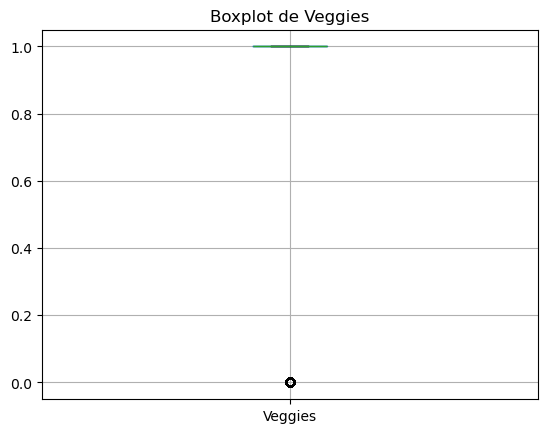

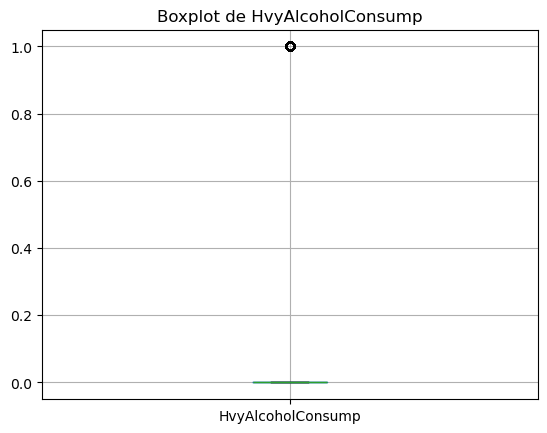

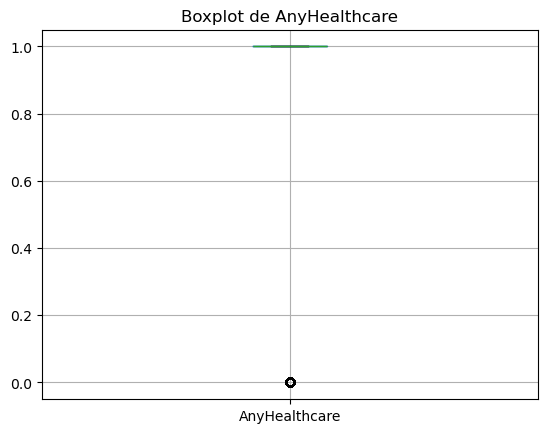

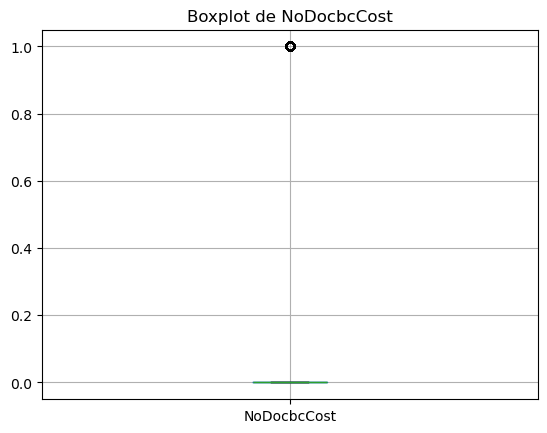

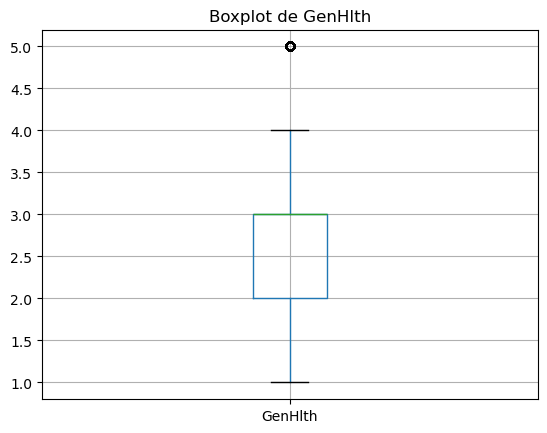

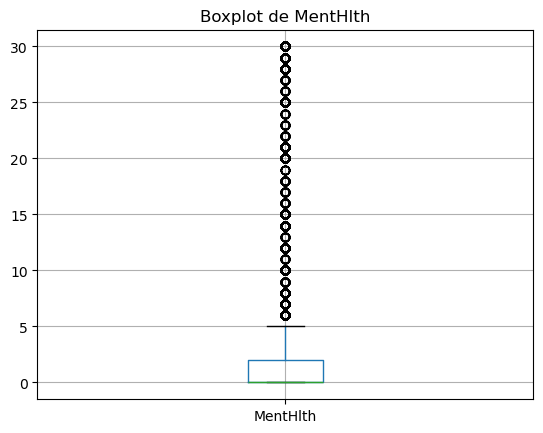

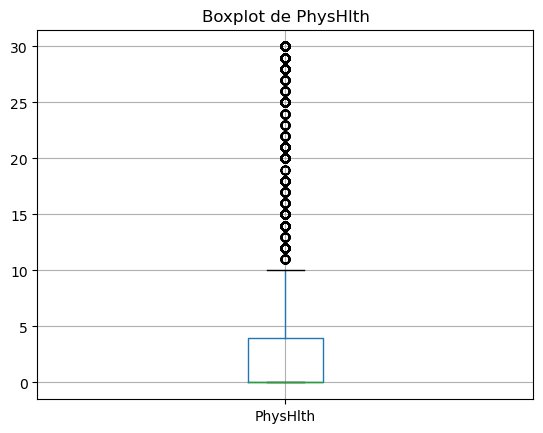

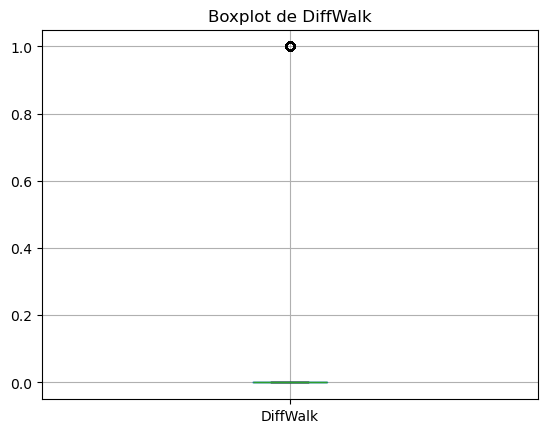

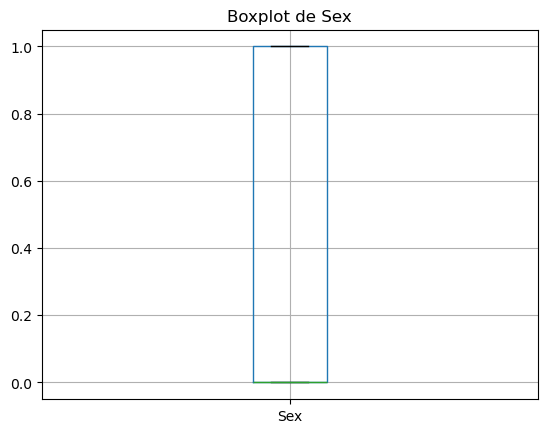

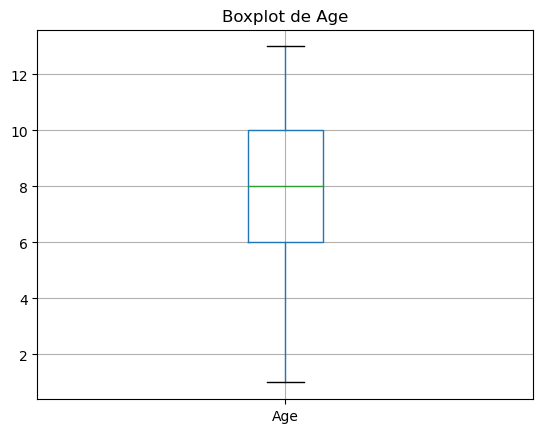

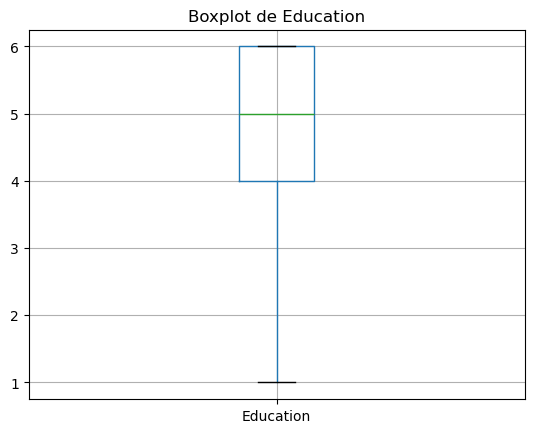

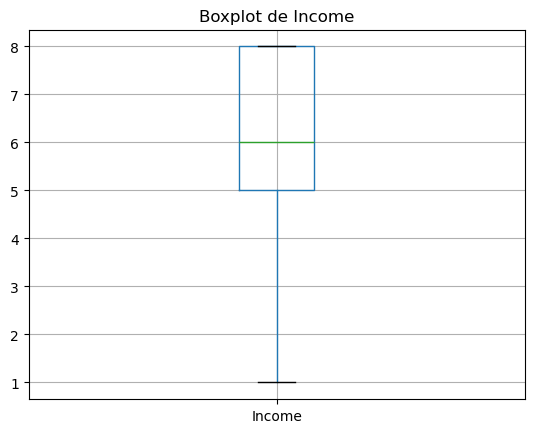

In [14]:
# Criar um boxplot para cada coluna
for column in df.columns:
  plt.figure()  # Cria uma nova figura para cada boxplot
  df.boxplot(column=column)
  plt.title(f'Boxplot de {column}')
  plt.show()

As principais colunas que apresentam outliers são: BMI, MentHlth, PhysHlth

In [16]:
# Identifica Outliers
def outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers

# Exibe Outliers
def outliers_iqr_plot(df, outs):
  for i in range(len(outs)):
    out = outliers_iqr(df, outs[i])
    print(outs[i])
    display(out)
  pass

# Verificando outliers 
outs = ['BMI', 'MentHlth', 'PhysHlth']
outliers_iqr_plot(df, outs)

BMI


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
85,2.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,30.0,1.0,0.0,9.0,6.0,8.0
97,0.0,1.0,0.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,6.0
156,2.0,1.0,1.0,1.0,47.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,6.0,5.0
201,2.0,1.0,1.0,1.0,55.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,15.0,0.0,0.0,11.0,5.0,2.0
203,0.0,1.0,1.0,1.0,49.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,15.0,1.0,0.0,0.0,9.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253370,0.0,1.0,0.0,1.0,46.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,30.0,30.0,0.0,0.0,4.0,6.0,1.0
253382,2.0,1.0,0.0,1.0,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,6.0,6.0,8.0
253402,2.0,1.0,1.0,1.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,7.0,1.0,0.0,7.0,6.0,5.0
253482,0.0,1.0,0.0,1.0,46.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,5.0,6.0,6.0


MentHlth


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
14,0.0,0.0,1.0,1.0,33.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,30.0,28.0,0.0,0.0,4.0,6.0,2.0
18,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,15.0,0.0,0.0,0.0,2.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253648,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,6.0,14.0,0.0,1.0,5.0,5.0,1.0
253649,0.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,30.0,5.0,0.0,0.0,4.0,6.0,5.0
253665,0.0,0.0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,30.0,30.0,0.0,0.0,5.0,4.0,1.0
253670,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0


PhysHlth


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
11,0.0,1.0,1.0,1.0,34.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,30.0,1.0,0.0,10.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253652,2.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,30.0,0.0,1.0,11.0,2.0,3.0
253653,0.0,0.0,0.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,15.0,0.0,1.0,10.0,6.0,3.0
253663,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,30.0,0.0,0.0,5.0,6.0,2.0
253665,0.0,0.0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,30.0,30.0,0.0,0.0,5.0,4.0,1.0


Apesar de serem apontados no boxplot como outliers essas informações estão dentro do esperado em relação a definição das colunas. Tratar essas linhas trocando pela média ou realizando sua remoção pode afetar a análise de correlação entre as variáveis, e por isso ao invés de alterar a informação vou realizar a mesma abordagem da coluna Age para PhysHlth, MentHlth e BMI, criando faixas com intervalos de dias e atribuido um valor numerico a elas. 

In [18]:
def categorize_column_by_boxplot(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  median = df[column].median()
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  def categorize_value(value):
    if value < lower_bound:
      return 0
    elif value >= lower_bound and value < Q1:
      return 1
    elif value >= Q1 and value < median:
      return 2
    elif value >= median and value < Q3:
      return 3
    elif value >= Q3 and value <= upper_bound:
      return 4
    else:
      return 5

  df[column] = df[column].apply(categorize_value)
  return df

Os valores das colunas seguem a seguinte lógica:
- 0: Ouliers abaixo do Limite Inferior
- 1: Valores que vão a partir do limite inferior até antes do primeiro quartil
- 2: Valores que vão do primeiro quartil até a mediana
- 3: Valores após a mediana até o terceiro quartil
- 4: Valores após o terceiro quartil quartil até o limite superior
- 5: Outliers maiores que o limite inferior

##### BMI

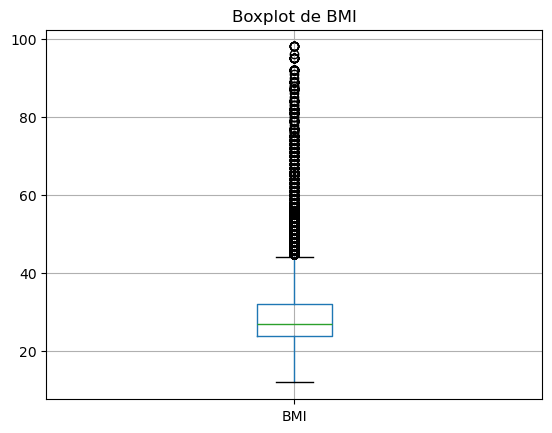

In [21]:
# Boxplot
plt.figure() 
df.boxplot(column=['BMI'])
plt.title(f'Boxplot de BMI')
plt.show()

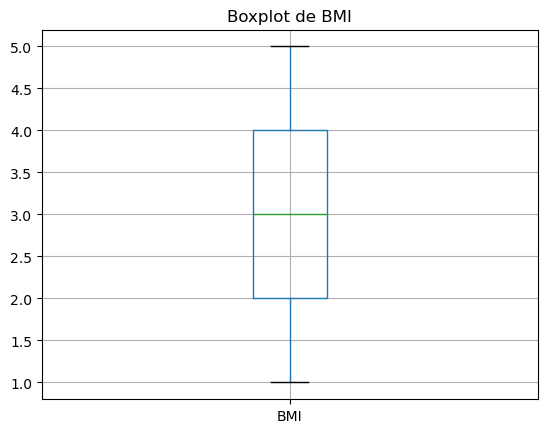

In [22]:
# Categorização
df = categorize_column_by_boxplot(df, 'BMI')
# Boxplot
plt.figure() 
df.boxplot(column=['BMI'])
plt.title(f'Boxplot de BMI')
plt.show()

In [23]:
##### PhysHlth

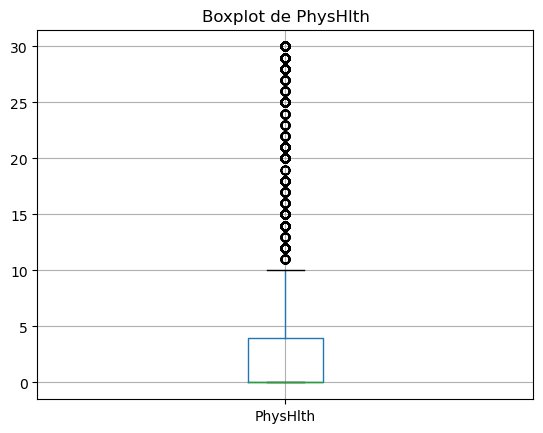

In [24]:
# Boxplot
plt.figure() 
df.boxplot(column=['PhysHlth'])
plt.title(f'Boxplot de PhysHlth')
plt.show()

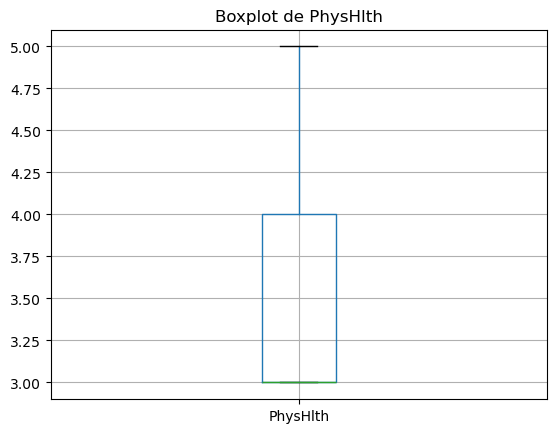

In [25]:
# Categorização
df = categorize_column_by_boxplot(df, 'PhysHlth')
# Boxplot
plt.figure() 
df.boxplot(column=['PhysHlth'])
plt.title(f'Boxplot de PhysHlth')
plt.show()

In [26]:
##### MentHlth

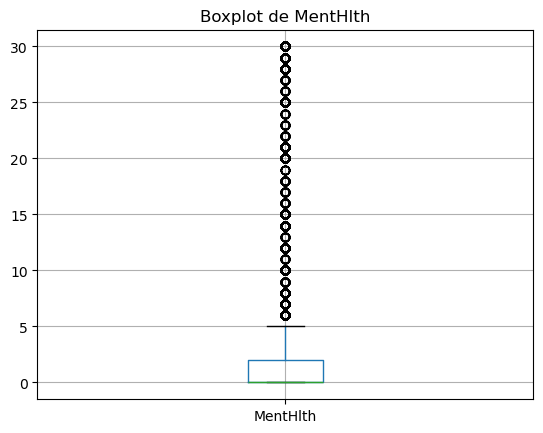

In [27]:
# Boxplot
plt.figure() 
df.boxplot(column=['MentHlth'])
plt.title(f'Boxplot de MentHlth')
plt.show()

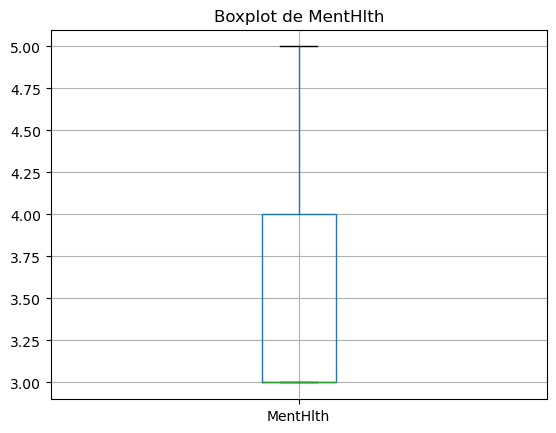

In [28]:
# Categorização
df = categorize_column_by_boxplot(df, 'MentHlth')
# Boxplot
plt.figure() 
df.boxplot(column=['MentHlth'])
plt.title(f'Boxplot de MentHlth')
plt.show()

# Estatísticas descritivas das variáveis

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,229781.0,0.325627,0.724623,0.0,0.0,0.0,0.0,2.0
HighBP,229781.0,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
HighChol,229781.0,0.441760,0.496598,0.0,0.0,0.0,1.0,1.0
CholCheck,229781.0,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
BMI,229781.0,2.675278,1.110560,1.0,2.0,3.0,4.0,5.0
Smoker,229781.0,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
Stroke,229781.0,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229781.0,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
PhysActivity,229781.0,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
Fruits,229781.0,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0


# Matriz de Correlação

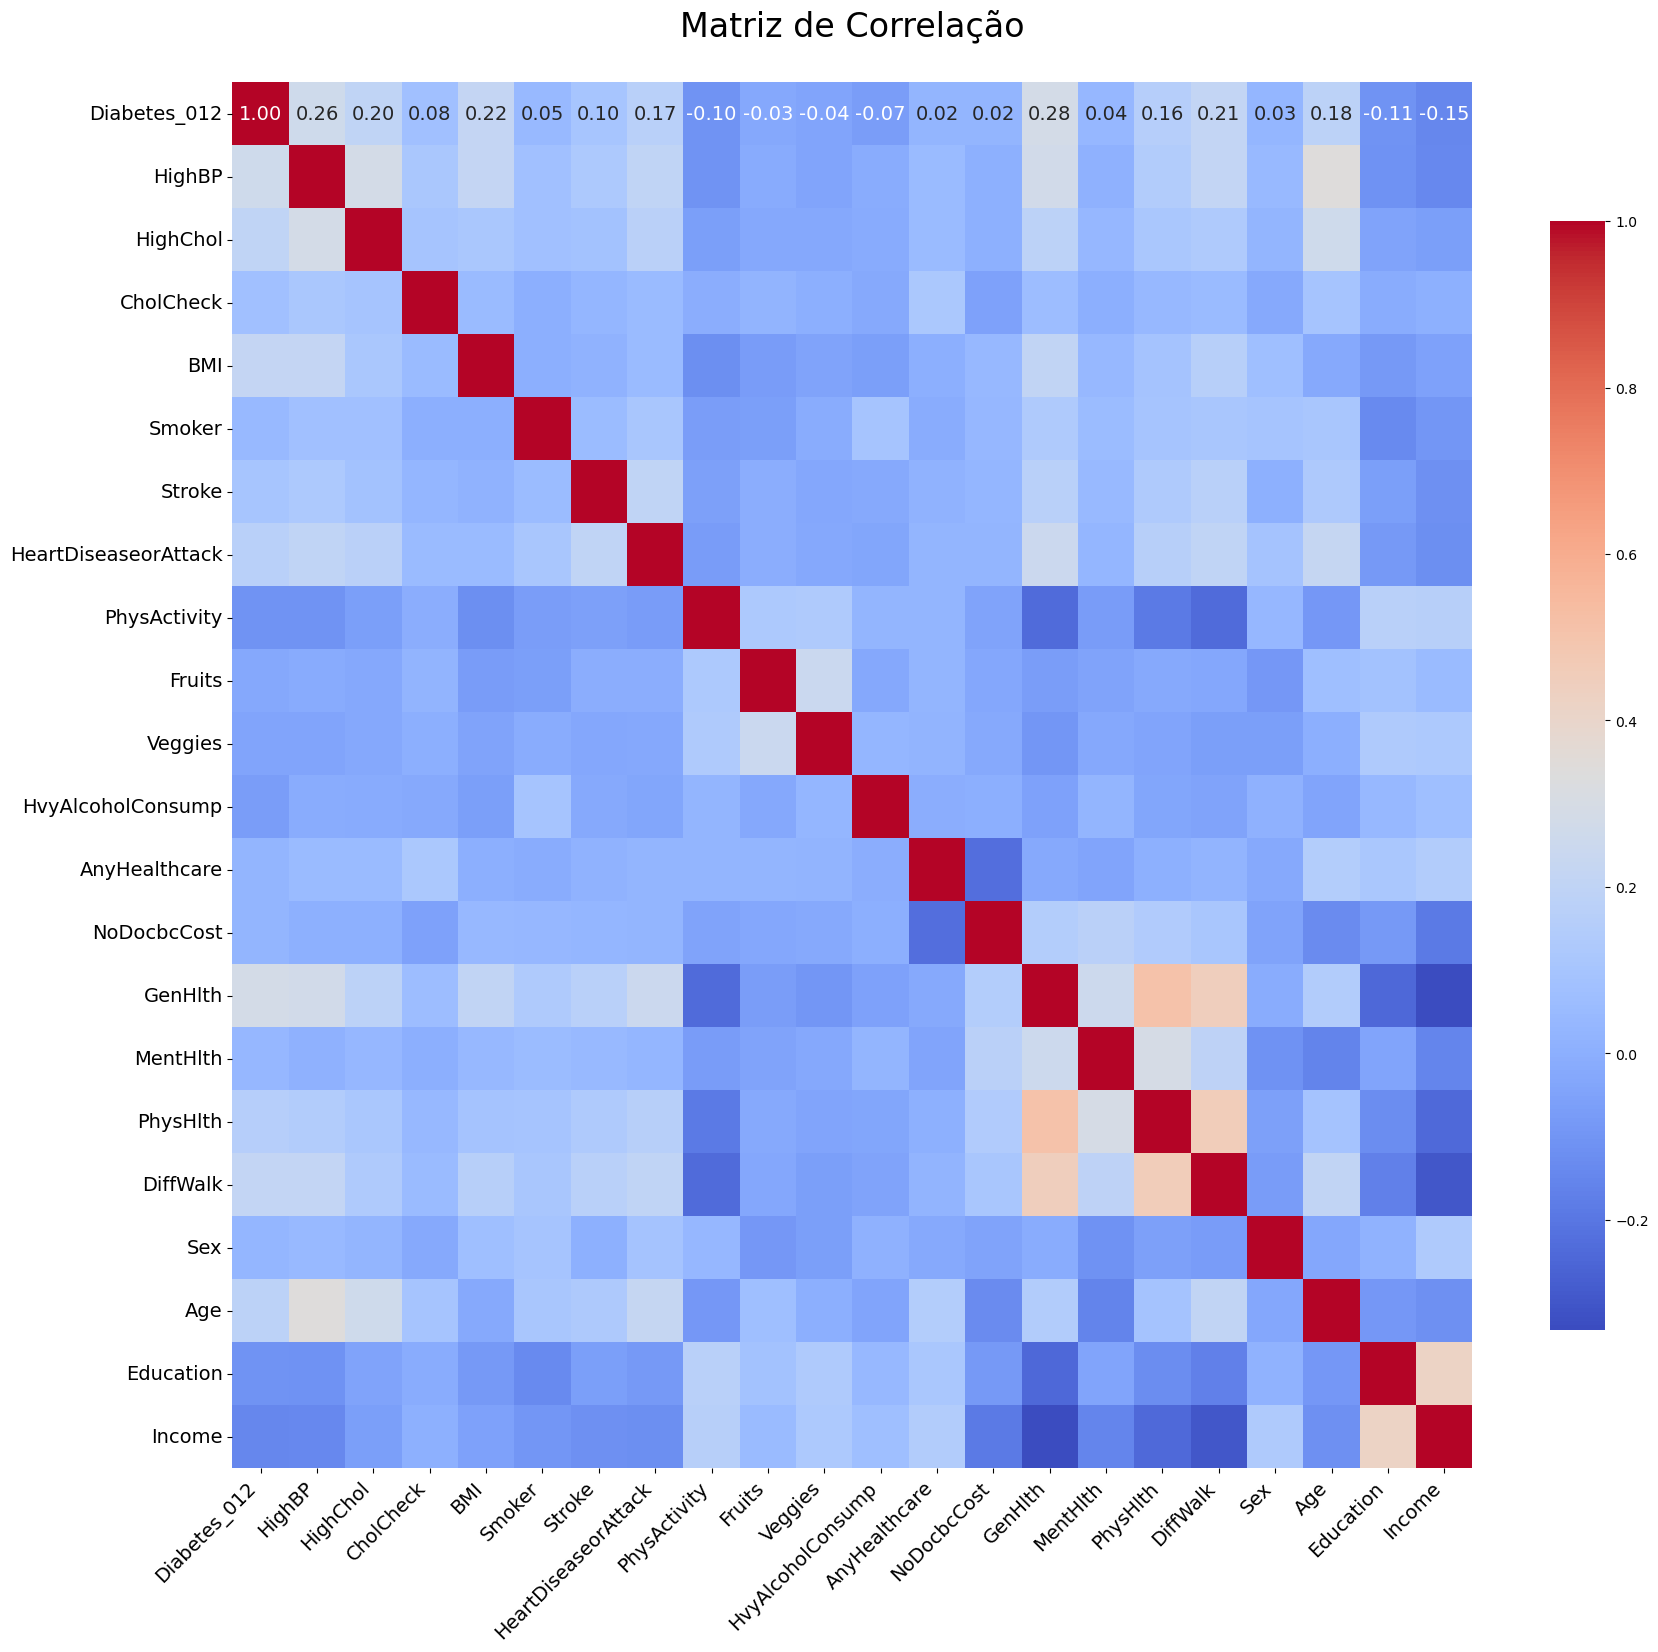

In [63]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 18)) 
plt.title(f'Matriz de Correlação\n', fontsize=24)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14}, cbar_kws={"shrink": 0.8})  # Adjust colorbar size
plt.xticks(rotation=45, ha='right', fontsize=14) 
plt.yticks(fontsize=14) 
plt.show()

Deu algum bug na visualização, coloquei uma imagem da matriz na pasta e por ela dá pra fazer a análise.

Levando em conta a matriz de correlação podemos observar algumas coisas:demos aprofundar mais em uma área específica se desejar.

1. **Diabetes_012 (Diabetes)**:
- **HighBP (Pressão Alta)**: Existe uma correlação moderada de 0.27 com a diabetes, o que faz sentido, já que a pressão alta é um fator de risco para o desenvolvimento de diabetes.
- **HighChol (Colesterol Alto)**: A correlação também é positiva (0.30), o que sugere que pessoas com colesterol alto têm mais probabilidade de desenvolver diabetes.
- **BMI (Índice de Massa Corporal)**: Correlação moderada de 0.22, indicando que um maior IMC está associado a uma maior chance de diabetes.
- **PhysActivity (Atividade Física)**: Há uma correlação negativa (-0.12), o que implica que a falta de atividade física pode estar relacionada a maiores chances de diabetes.



2. **HighBP (Pressão Alta)**:
- **HighChol (Colesterol Alto)**: Correlação de 0.30, indicando que pessoas com pressão alta também têm maior probabilidade de ter colesterol elevado.
- **Stroke (Derrame)**: Correlação de 0.13, o que é um fator de risco esperado, já que a pressão alta contribui para derrames.
- **HeartDiseaseorAttack (Doença Cardíaca ou Infarto)**: Correlação de 0.21, mostrando que a pressão alta é um fator de risco para doenças cardíacas.



3. **HighChol (Colesterol Alto)**:
- **BMI**: Correlação positiva de 0.21, sugerindo que um IMC elevado pode estar associado a colesterol alto.
- **HeartDiseaseorAttack**: Correlação de 0.18, indicando que colesterol alto está ligado a maiores chances de doenças cardíacas.



4. **CholCheck (Verificação de Colesterol)**:
- A correlação com as variáveis principais é geralmente baixa, sugerindo que o simples fato de verificar o colesterol regularmente não está fortemente associado a outros indicadores de saúde, como diabetes ou doenças cardíacas.



5. **BMI (Índice de Massa Corporal)**:
- **HighBP**: Correlação de 0.21, mostrando que um IMC elevado está associado à pressão alta.
- **PhysActivity**: Correlação negativa de -0.15, indicando que pessoas com IMC elevado tendem a ser menos ativas fisicamente.



6. **Smoker (Fumante)**:
- As correlações entre fumar e outras variáveis de saúde, como diabetes e doenças cardíacas, são relativamente baixas, sugerindo que, neste conjunto de dados, fumar pode não ser o principal fator determinante dessas condições.



7. **Stroke (Derrame)**:
- **HighBP**: Correlação de 0.13, confirmando a relação esperada entre pressão alta e derrames.
- **HeartDiseaseorAttack**: Correlação de 0.18, indicando que pessoas com doenças cardíacas também têm maior probabilidade de ter derrames.



8. **HeartDiseaseorAttack (Doença Cardíaca ou Infarto)**:
- **HighBP** e **HighChol** são fatores de risco evidentes, com correlações de 0.21 e 0.18, respectivamente.
- **PhysActivity**: Correlação negativa (-0.13), sugerindo que a falta de atividade física está associada a maiores chances de doenças cardíacas.



9. **PhysActivity (Atividade Física)**:
- Correlações negativas com **BMI** (-0.15), **HighBP** (-0.13), e **HeartDiseaseorAttack** (-0.13) indicam que a prática de atividades físicas pode reduzir os riscos dessas condições.



10. **Fruits (Consumo de Frutas)** e **Veggies (Consumo de Vegetais)**:
- As correlações com outras variáveis de saúde são fracas, sugerindo que, isoladamente, o consumo de frutas e vegetais pode não ser um fator preditivo forte para as condições de saúde analisadas.



11. **HvyAlcoholConsump (Consumo Excessivo de Álcool)**:
- A correlação com as outras variáveis de saúde é geralmente baixa, mas o impacto a longo prazo pode não ser capturado nesta análise.



12. **GenHlth (Saúde Geral)**:
- **PhysHlth** (0.52) e **MentHlth** (0.35): A saúde geral está fortemente correlacionada com o número de dias em que a saúde física e mental não foram boas.



13. **MentHlth (Saúde Mental)**:
- Correlações negativas com **Income** (-0.21) e **Education** (-0.28) indicam que rendas e níveis de educação mais baixos estão associados a pior saúde mental.



14. **DiffWalk (Dificuldade de Caminhar)**:
- Correlação significativa com **HighBP** (0.22) e **BMI** (0.24), sugerindo que condições relacionadas à mobilidade podem ser exacerbadas pela pressão alta e pelo peso elevado.



15. **Income (Renda)**:
- Correlação negativa com **GenHlth** (-0.37) e **MentHlth** (-0.21), sugerindo que rendas mais baixas estão associadas a pior saúde geral e mental.



# Análise Gráfica

# Teste de Hipótese

### Hipótese 1: 

### Hipótese 2: 